In [1]:
import cv2
import imutils
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def display(img):    
    plt.imshow(img)
    plt.show()

In [3]:
img1 = cv2.imread("img1.jpg")
img2 = cv2.imread("img1.jpg")

In [4]:
print("Shape : ",img1.shape)
print("Shape : ",img2.shape)

Shape :  (628, 498, 3)
Shape :  (628, 498, 3)


In [5]:
for _ in range(100):
    modified_height = np.random.randint(0,628)
    modified_width  = np.random.randint(0,498)
    #print(img2[modified_height][modified_width])
    img2[modified_height][modified_width]= (0,255,0)
    #print(img2[modified_height][modified_width])

In [45]:
height, width, channels = img1.shape
modified_height = np.random.randint(0, int(height/9))
modified_width  = np.random.randint(0, int(width/9))

In [46]:
for i in range(modified_height):
    for j in range(modified_width):
        # Modify the individual pixel values
        img2[i, j] = (255, 0, 0)

In [72]:
img1.shape

(628, 498, 3)

In [73]:
img1[0][2]

array([250, 252, 215], dtype=uint8)

In [74]:
img1[0,2]

array([250, 252, 215], dtype=uint8)

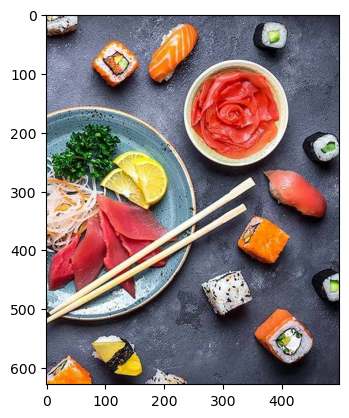

In [6]:
display(img1)

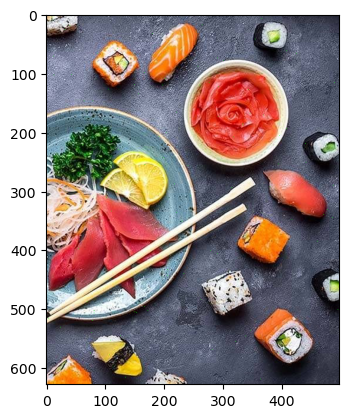

In [7]:
display(img2)

In [5]:
rows, cols = img1.shape[:2]
last_pixel = img1[rows-1, cols-1]

print("last pixel of img1[{}, {}] --> {}".format(rows-1, cols-1, last_pixel))

last pixel of img1[627, 497] --> [72 60 54]


In [6]:
rows, cols = img2.shape[:2]
last_pixel = img2[rows-1, cols-1]

print("last pixel of img2[{}, {}] --> {}".format(rows-1, cols-1, last_pixel))

last pixel of img2[627, 497] --> [255   0   0]


In [7]:
## Resizing the image [If differing dimensions are encountered]

In [8]:
def resize_big_to_small_image(img1, img2):
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]

    # Resize the larger image to the size of the smaller image
    if h1 > h2 or w1 > w2:
        img1 = cv2.resize(img1, (w2, h2), interpolation = cv2.INTER_CUBIC)
    else:
        img2 = cv2.resize(img2, (w1, h1), interpolation = cv2.INTER_CUBIC)
        
    return img1, img2

In [9]:
img1, img2 = resize_big_to_small_image(img1, img2)

In [10]:
print("Shape : ",img1.shape)
print("Shape : ",img2.shape)

Shape :  (628, 498, 3)
Shape :  (628, 498, 3)


## Spotting the difference

In [6]:
def compare_images(img1, img2):
    dict1 = {}
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
                if not np.array_equal(img1[i][j], img2[i][j]):
                    value = []
                    index = (i,j)
                    value.append(img1[i][j])
                    value.append(img2[i][j])
                    dict1[index] = value
    return dict1

In [7]:
hash_dict = compare_images(img1, img2)

In [8]:
def extract_values(lst):
    return lst[0], lst[1]

In [9]:
df = pd.DataFrame(list(hash_dict.items()), columns=['Index', 'image-1_and_image-2_pixel'])

df.head()

,Index,image-1_and_image-2_pixel
0,"(4, 443)","[[65, 50, 48], [0, 255, 0]]"
1,"(22, 397)","[[219, 217, 209], [0, 255, 0]]"
2,"(24, 351)","[[136, 117, 110], [0, 255, 0]]"
3,"(25, 198)","[[140, 121, 114], [0, 255, 0]]"
4,"(26, 281)","[[152, 133, 126], [0, 255, 0]]"


In [10]:
df[['image-1 pixel', 'image-2 pixel']] = df['image-1_and_image-2_pixel'].apply(extract_values).apply(pd.Series)
df.drop('image-1_and_image-2_pixel', axis=1, inplace=True)

df.head()

,Index,image-1 pixel,image-2 pixel
0,"(4, 443)","[65, 50, 48]","[0, 255, 0]"
1,"(22, 397)","[219, 217, 209]","[0, 255, 0]"
2,"(24, 351)","[136, 117, 110]","[0, 255, 0]"
3,"(25, 198)","[140, 121, 114]","[0, 255, 0]"
4,"(26, 281)","[152, 133, 126]","[0, 255, 0]"


In [11]:
len(df)

100

## Copying the image-2 pixel values into image-1 pixel values

In [12]:
def mse(img1, img2):
    h, w, c = img1.shape
    diff    = cv2.subtract(img1, img2)
    err     = np.sum(diff**2)
    mse     = err/(float(h*w))
    return mse

In [13]:
mse(img1, img2)

0.07144501573171667

In [14]:
# Compute the absolute difference between the pixel values of the two images
diff = cv2.absdiff(img1, img2)

# Copy the differing pixels from the difference image to the second image
img2 = np.where(diff != 0, diff, img2)

In [15]:
mse(img1, img2)

0.01139270457626685

In [ ]:
display(im)

In [17]:
## chaging only the mis-matched values
for i in range(len(df)):
    ## 1st column           2nd column
    img2[df.iloc[i][2]] = img1[df.iloc[i][1]]

In [18]:
mse(img1, img2)

34.63301614099711

In [18]:
hash_dict = compare_images(img1, img2)

In [19]:
df = pd.DataFrame(list(hash_dict.items()), columns=['Index', 'image-1_and_image-2_pixel'])

df.head()

,Index,image-1_and_image-2_pixel
0,"(7, 365)","[[78, 85, 104], [78, 170, 104]]"
1,"(18, 264)","[[106, 113, 131], [106, 142, 131]]"
2,"(19, 40)","[[215, 201, 192], [215, 54, 192]]"
3,"(26, 32)","[[143, 115, 112], [143, 140, 112]]"
4,"(33, 180)","[[92, 99, 118], [92, 156, 118]]"


In [20]:
len(df)

99

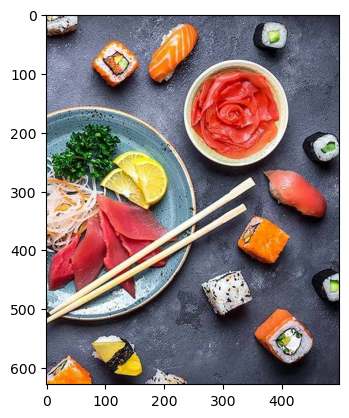

In [21]:
display(img1)

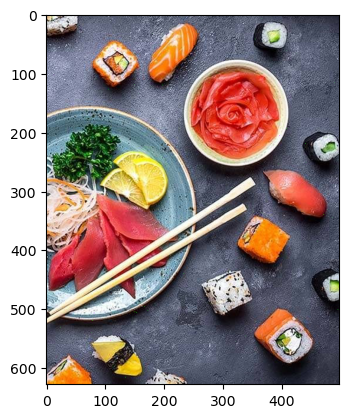

In [22]:
display(img2)

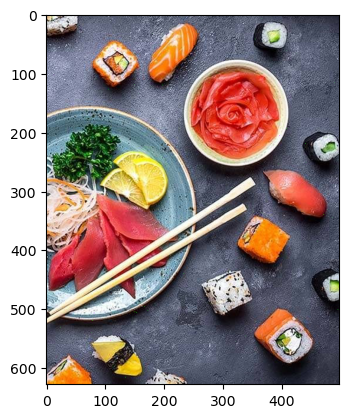

In [23]:
display(img2)

In [ ]:
df = pd.DataFrame(list(hash_dict.items()), columns=['Index', 'image-1_and_image-2_pixel'])

df.head()